In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

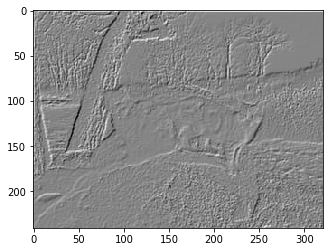

In [78]:
# Problem 1 
filter1 = np.array([[0, -1/4, 0],[-1/4, 1, -1/4],[0, -1/4, 0]])  # img(x,y) - avg(img(x-1,y), img(x+1,y), img(x, y-1), img(x, y + 1))

# problem 2
filter2 = np.array([[0, 0, 0],[0, -1, 1],[0, 0, 0]]) #gradx(y,x) = im(y,x+1)-im(y,x)

# problem 3
img = cv2.imread('./sample1.jpg',0) # read the image
# 1. horizontal edge
filter31 = np.array([[1, 2, 1],[0, 0, 0],[-1,-2,-1]])

# 2. vertical edge
filter32 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

#3. transform filters to frequency domain
#   step 3-6 is based on the text book

w, h = img.shape[0]*2, img.shape[1]*2

f_filter31 = np.fft.fftn(filter31,(w,h))
f_filter32 = np.fft.fftn(filter32,(w,h))

#4. transform sample1.jpg to the frequency domain

f_img = np.fft.fftn(img,(w,h))

# 5. Apply the appropriate operations in the frequency domain

horizontal_edge = f_filter31*f_img
vertical_edge = f_filter32*f_img
#6. Transform the data back into the spatial domain
s_horizontal_edge = np.fft.ifft2(horizontal_edge)
s_vertical_edge = np.fft.ifft2(vertical_edge)
s_horizontal_edge = s_horizontal_edge[0:img.shape[0], 0:img.shape[1]]
s_vertical_edge = s_vertical_edge[0:img.shape[0], 0:img.shape[1]]
#7. Sum the horizontal and vertical edge components together
new_img = s_horizontal_edge + s_vertical_edge

plt.imshow(new_img.real,cmap = 'gray')



